# LEAP AI/ML Workshop 4 - Supervised Classification Problem

## We will walk through the following steps during the workshop:
•Read csv data into a pandas dataframe.

•Inspect the dataframe with pandas and matplotlib

•Cleanse the data so that it works better for the algorithms

•Run a simple AI model to group the data into categories


In [2]:
# Import the python libraries required for this example
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Load the automobiles dataset into a pandas dataframe - note that you might have to edit the path to specific the
automobiles=pd.read_csv("./automobiles.csv")

In [4]:
automobiles.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,Luxury Vehicle
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Luxury
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Luxury
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Luxury
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.4,10.0,102,5500,24,30,13950,Luxury
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.4,8.0,115,5500,18,22,17450,Ordinary


In [5]:
# List the columns in the dataframe
automobiles.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'Luxury Vehicle'],
      dtype='object')

In [6]:
#Feature Engineering
automobiles["average-mpg"]=automobiles[['city-mpg','highway-mpg']].mean(axis=1)

In [7]:
automobiles.drop(['city-mpg','highway-mpg'],axis=1,inplace=True)

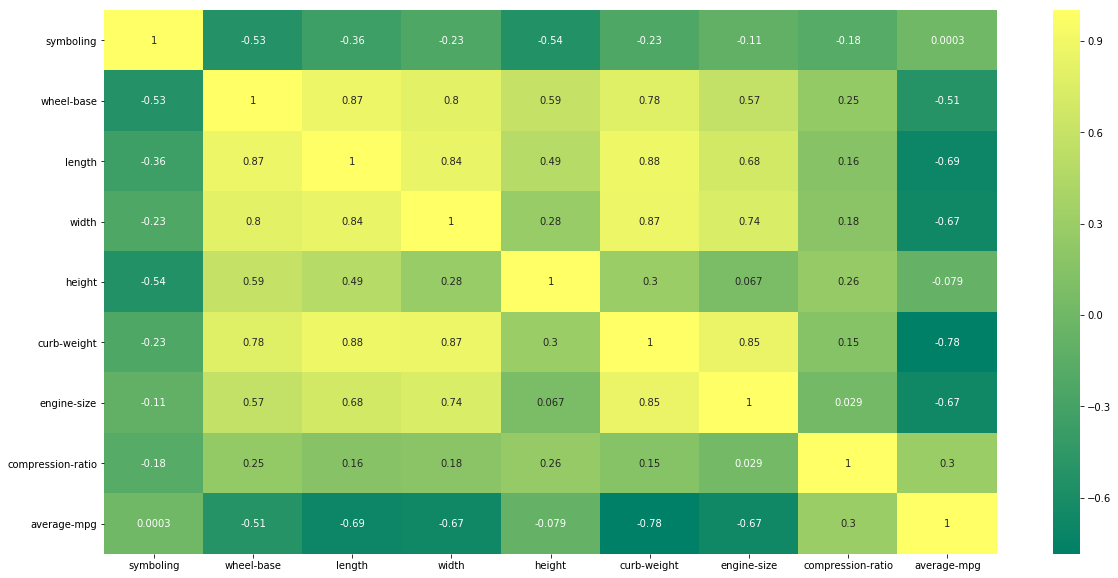

In [8]:
# Use matplotlib and seaborn to plot a heatmap
# the more yellow the squares, the more correlation there is between row and column,
# e.g. wheel-base and length are closely correlated (0.89)
# Similarly, curb-weight and highway-mpg have a high negative correlation (-0.8)
plt.figure(figsize=(20,10))
sns.heatmap(automobiles.corr(),annot=True,cmap='summer')

In [10]:
automobiles.drop(['wheel-base','curb-weight','width'],axis=1,inplace=True)

## Cleanse the data so that we can run regression algorithms on it
Clean up bad or missing data, replacing it with sensible values that the regression algorithm can use.

In [11]:
#Removing the ? data from the dataset using normalized-losses!= '?' condition
clean_normalized = automobiles[automobiles['normalized-losses']!= '?']

In [12]:
clean_normalized['normalized-losses'] = clean_normalized['normalized-losses'].astype(int)

C:\Users\BZMXJB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
#Removing the ? data from the dataset using price!= '?' condition
clean_price=clean_normalized[clean_normalized['price']!='?']

In [14]:
clean_price['price']=clean_price['price'].astype(int)

In [15]:
# Clean up the bore column - replace ? values with the mean value for bore (float)
clean_bore = clean_price[clean_price['bore']!= '?']
mean_bore = (clean_bore['bore'].astype(float)).mean()
clean_price['bore'] = clean_price['bore'].replace('?',mean_bore).astype(float)

In [16]:
# Clean up the cleaned_stroke column 
clean_stroke = clean_price[clean_price['stroke']!= '?']
mean_stroke = (clean_stroke['stroke'].astype(float)).mean()
clean_price['stroke'] = clean_price['stroke'].replace('?',mean_stroke).astype(float)

In [17]:
# Clean up the peak-rpm column
clean_peak_rpm = clean_price[clean_price['peak-rpm'] != '?']
mean_peak_rpm = (clean_peak_rpm['peak-rpm'].astype(float)).mean()
clean_price['peak-rpm'] = clean_price['peak-rpm'].replace('?',mean_peak_rpm).astype(float)

In [18]:
# Clean up the horsepower column
clean_horsepower = clean_price[clean_price['horsepower']!= '?']
mean_horsepower = (clean_horsepower['horsepower'].astype(float)).mean()
clean_price['horsepower'] = clean_price['horsepower'].replace('?',mean_horsepower).astype(float)

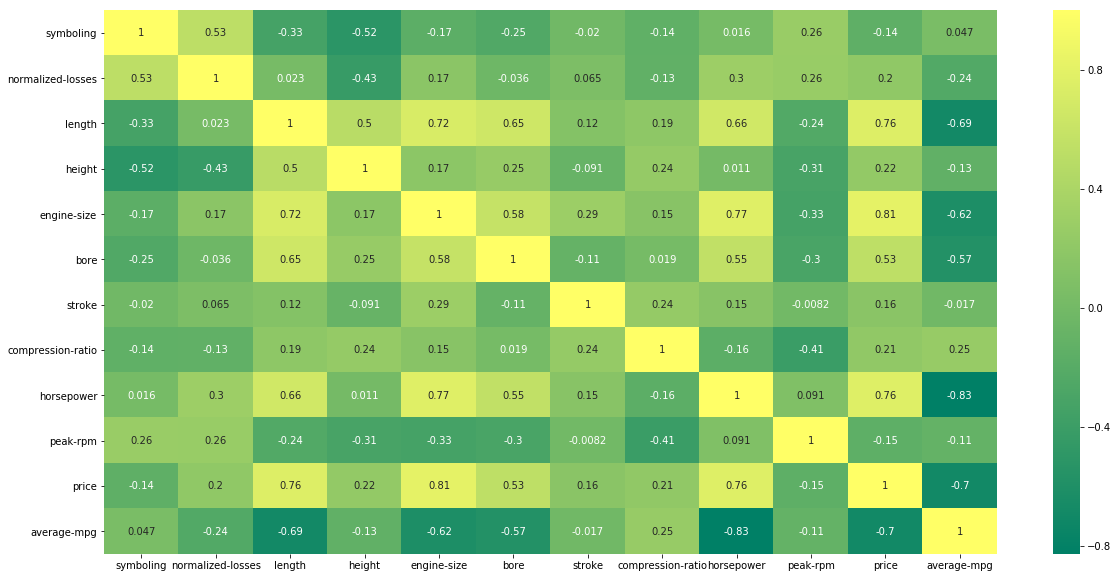

In [19]:
# Use matplotlib and seaborn to plot a heatmap
# the more yellow the squares, the more correlation there is between row and column,
# e.g. wheel-base and length are closely correlated (0.89)
# Similarly, curb-weight and highway-mpg have a high negative correlation (-0.8)
plt.figure(figsize=(20,10))
sns.heatmap(clean_price.corr(),annot=True,cmap='summer')

In [20]:
clean_price.drop(['engine-size','length','horsepower'],axis=1,inplace=True)

In [21]:
# Map two to 2, four to 4, and ? to 4 for num-of-doors
clean_price['num-of-doors']=clean_price['num-of-doors'].map({'two':2,'four':4,'?':4})
# Arbitrary mapping to numbers for other fields
clean_price['fuel-type']=clean_price['fuel-type'].map({'gas':1,'diesel':2,'?':2})
clean_price['aspiration']=clean_price['aspiration'].map({'std':1,'turbo':2,'?':2})
clean_price['body-style']=clean_price['body-style'].map({'sedan':1,'hatchback':2,'wagon':3,'hardtop':4,'convertible':5,'?':2})
clean_price['drive-wheels']=clean_price['drive-wheels'].map({'fwd':1,'rwd':2,'4wd':3,'?':2})
clean_price['engine-location']=clean_price['engine-location'].map({'front':1,'rear':2,'?':2})

In [22]:
# Add boolean (0/1) value columns for each value of fuel-system, make, engine-type, num-of-cylinders
for i in ['fuel-system','make','engine-type','num-of-cylinders']:
        i_dummy = pd.get_dummies(clean_price[i],prefix=i,prefix_sep = '_',drop_first=True)
        clean_price.drop([i],axis=1,inplace=True)
        clean_price= pd.concat([clean_price,i_dummy],axis=1)

In [23]:
clean_price['Luxury Vehicle']=clean_price['Luxury Vehicle'].map({'Luxury':1,'Ordinary':2})

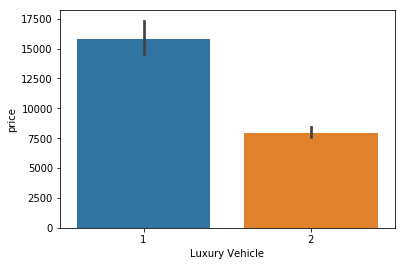

In [24]:
sns.barplot(clean_price['Luxury Vehicle'],clean_price['price'])

In [25]:
from sklearn.cluster import KMeans

In [27]:
kmeans = KMeans(n_clusters=4)

In [28]:
kmeans.fit(clean_price)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [29]:
kmeans.cluster_centers_

array([[ 8.47058824e-01,  1.14576471e+02,  1.05882353e+00,
         1.05882353e+00,  3.05882353e+00,  1.74117647e+00,
         1.16470588e+00,  1.00000000e+00,  5.33741176e+01,
         3.15505882e+00,  3.21400000e+00,  9.81305882e+00,
         5.16058824e+03,  7.41660000e+03,  1.91764706e+00,
         3.31882353e+01,  6.82352941e-01, -1.04083409e-17,
         5.88235294e-02, -3.46944695e-18,  9.41176471e-02,
         4.70588235e-02, -1.38777878e-17,  3.52941176e-02,
         9.41176471e-02,  1.17647059e-01, -3.46944695e-18,
         8.23529412e-02,  2.77555756e-17,  1.05882353e-01,
         1.29411765e-01,  6.93889390e-17,  7.05882353e-02,
        -3.46944695e-18, -2.08166817e-17,  9.41176471e-02,
         2.11764706e-01,  5.88235294e-02, -4.16333634e-17,
         1.17647059e-02,  8.82352941e-01,  9.41176471e-02,
        -2.77555756e-17, -1.38777878e-17,  6.93889390e-17,
         9.88235294e-01,  1.38777878e-16,  1.17647059e-02,
        -1.38777878e-17],
       [ 7.14285714e-01,  1.44

In [30]:
kmeans.labels_

array([3, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 2, 0, 0, 0, 0, 0, 3, 3, 3, 1, 0,
       0, 3, 3, 3, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 3, 3, 1, 1, 1, 1, 0, 0, 0, 0, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       3, 3, 3, 3, 1, 0, 3, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1])

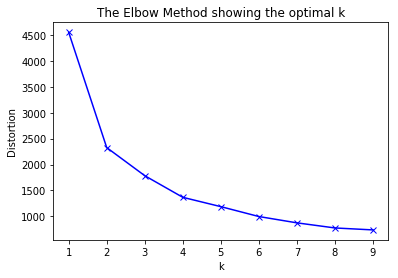

In [36]:
from scipy.spatial.distance import cdist
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(clean_price)
    kmeanModel.fit(clean_price)
    distortions.append(sum(np.min(cdist(clean_price, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / clean_price.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
